# Projeto final

Bem vindo ao projeto final do curso/módulo de Pandas.
Neste projeto, você deve responder a um conjunto de perguntas feitas a dois conjuntos de dados:

1. [Obesity among adults by country, 1975-2016](https://www.kaggle.com/amanarora/obesity-among-adults-by-country-19752016/)
2. [GDP Per Person (1901-2011)](https://www.kaggle.com/divyansh22/gdp-per-person-19012011?select=GDP.csv)

Tais conjuntos de dados são públicos foram publicados no Kaggle. Mais instruções sobre cada um deles podem ser encontrados nos links acima. Você também os encontrará na pasta `Datasets`, dentro de nossas apostilas.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Perguntas - Obesity among adults by country, 1975-2016

In [3]:
df_obesity = pd.read_csv("obesity_cleaned.csv")

In [4]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24570 entries, 0 to 24569
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   24570 non-null  int64 
 1   Country      24570 non-null  object
 2   Year         24570 non-null  int64 
 3   Obesity (%)  24570 non-null  object
 4   Sex          24570 non-null  object
dtypes: int64(2), object(3)
memory usage: 959.9+ KB


- Limpe os dados do DataFrame, criando uma coluna de nome 'Obesity' que conterá os valores de obesidade. Transforme em float as colunas que porventura foram importadas como string.

In [5]:
df_obesity['Obesity (%)'] = (
    df_obesity['Obesity (%)']
    .str.replace(r'\[.*\]', '', regex=True)  # Remove tudo dentro de colchetes
    .str.replace('%', '')                    # Remove o símbolo %
    .replace('N/A', 'NaN')           )        # Substitui 'N/A' por 'NaN'   

In [6]:
df_obesity['Obesity (%)'] = pd.to_numeric(df_obesity['Obesity (%)'], errors='coerce') # Converte para float

In [7]:
df_obesity['Obesity'] = df_obesity['Obesity (%)']

- Qual o percentual médio de obesidade por sexo no mundo no ano de 2015?

In [8]:
df_obesity_2015 = df_obesity[df_obesity['Year'] == 2015]
df_obesity_2015 = df_obesity_2015.groupby('Sex')['Obesity (%)'].mean().reset_index()

In [9]:
df_obesity_2015

,Sex,Obesity (%)
0,Both sexes,19.508377
1,Female,22.899476
2,Male,15.980628


- Quais são os 5 países com a maior e a menor taxa de aumento nos índices de obesidade no período observado?

In [13]:
df_by_country = df_obesity.dropna(subset=['Obesity (%)']) # eliminando os NaN com .dropna
df_by_country = df_by_country.groupby('Country').apply(lambda x: (x['Obesity (%)'].iloc[-1] - x['Obesity (%)'].iloc[0])).reset_index(name='Taxa de Aumento')

C:\Users\alant\AppData\Local\Temp\ipykernel_12880\1052293033.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_by_country = df_by_country.groupby('Country').apply(lambda x: (x['Obesity (%)'].iloc[-1] - x['Obesity (%)'].iloc[0])).reset_index(name='Taxa de Aumento')


In [14]:
df_by_country = df_by_country.sort_values(by='Taxa de Aumento', ascending=False)

In [15]:
df_by_country_top_5_head = df_by_country.head(5)
df_by_country_top_5_tail = df_by_country.tail(5)

In [16]:
df_by_country_top_5_head

,Country,Taxa de Aumento
176,Tuvalu,38.3
125,Niue,36.2
147,Samoa,34.8
171,Tonga,34.6
90,Kiribati,34.5


In [17]:
df_by_country_top_5_tail

,Country,Taxa de Aumento
29,Cambodia,4.5
138,Republic of Korea,4.2
154,Singapore,3.3
86,Japan,2.7
187,Viet Nam,2.5


- Quais os países com maiores e menores níveis percetuais de obesidade em 2015?

In [18]:
df_obesity_2015 = df_obesity[df_obesity['Year'] == 2015] # tive que refazer essa variavel pois dei um groupby em uma resposta la em cima

df_countries_max_min = df_obesity_2015.groupby((df_obesity_2015['Sex'])).agg(
    maior_tax = ('Obesity (%)', 'max'),
    country_max_tax = ('Country', lambda x: x[df_obesity_2015.loc[x.index, 'Obesity (%)'].idxmax()]),
    menor_tax = ('Obesity (%)', 'min'),
    country_min_tax = ('Country', lambda x: x[df_obesity_2015.loc[x.index, 'Obesity (%)'].idxmin()])
)

In [19]:
df_countries_max_min

,maior_tax,country_max_tax,menor_tax,country_min_tax
Sex,,,,
Both sexes,60.7,Nauru,2.0,Viet Nam
Female,63.1,Nauru,2.4,Viet Nam
Male,58.2,Nauru,1.5,Viet Nam


- Qual a diferença média percentual de obesidade entre sexos ao longo dos anos para o Brasil?

In [32]:
df_obesity_in_brasil = df_obesity[df_obesity['Country'] == 'Brazil']
df_obesity_in_brasil_per_year = df_obesity_in_brasil.groupby(['Year', 'Sex'])['Obesity (%)'].mean().unstack().reset_index()

In [35]:
df_obesity_in_brasil_per_year

Sex,Year,Obesity Both (%),Obesity Female (%),Obesity Male (%),Diferença entre sexos (%) (M - F)
0,1975,5.2,7.3,3.0,-4.3
1,1976,5.5,7.6,3.2,-4.4
2,1977,5.7,8.0,3.4,-4.6
3,1978,6.0,8.3,3.6,-4.7
4,1979,6.3,8.7,3.8,-4.9
5,1980,6.6,9.0,4.1,-4.9
6,1981,6.9,9.4,4.3,-5.1
7,1982,7.2,9.8,4.6,-5.2
8,1983,7.6,10.2,4.8,-5.4
9,1984,7.9,10.6,5.1,-5.5


In [34]:
df_obesity_in_brasil_per_year['Diferença entre sexos (%) (M - F)'] = round((df_obesity_in_brasil_per_year['Male'] - df_obesity_in_brasil_per_year['Female']), 2)
df_obesity_in_brasil_per_year = df_obesity_in_brasil_per_year.rename(
    columns={'Male': 'Obesity Male (%)', 'Female': 'Obesity Female (%)', 'Both sexes': 'Obesity Both (%)'}
)

- Você conseguiria plotar um gráfico mostrando a evolução da obesidade para ambos sexos no mundo?

In [36]:
df_obesity_in_world_per_year = df_obesity.groupby(['Year', 'Sex'])['Obesity (%)'].mean().unstack().reset_index()

In [39]:
df_obesity_in_world_per_year

Sex,Year,Both sexes,Female,Male
0,1975,6.510995,8.850262,4.076440
1,1976,6.737696,9.120419,4.251832
2,1977,6.962304,9.396859,4.427225
3,1978,7.193717,9.676963,4.612565
4,1979,7.430890,9.963351,4.805236
5,1980,7.676440,10.256021,5.002094
6,1981,7.923560,10.552356,5.205759
7,1982,8.181152,10.850262,5.421466
8,1983,8.434031,11.159162,5.637173
9,1984,8.709948,11.465445,5.858115


<Axes: xlabel='Year'>

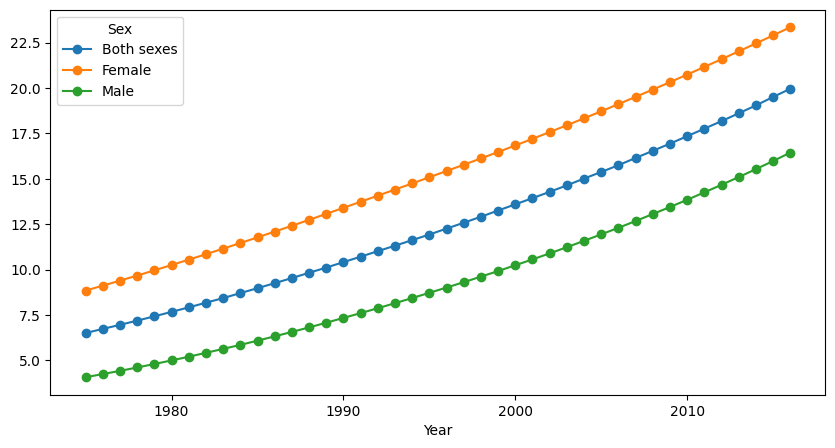

In [42]:
df_obesity_in_world_per_year.plot(x='Year', kind='line', marker='o', label='World', figsize=(10, 5))  

## Perguntas - GDP Per Person (1901-2011)

In [ ]:
df_gdp = pd.read_csv("Datasets/GDP.csv", decimal=".")

- Limpe o conjunto de dados, convertendo strings em datas ou float, quando necessário.

- Você conseguiria informar o primeiro valor registrado de cada país?

- Informe as regiões com maiores crescimentos de PIB per capita no século passado.

- Preecha os anos ausentes em cada país com uma estimativa, baseada na diferença entre o próximo registro e o anterior.

### DESAFIOS
- Você conseguiria criar um mapa do gdp ou da obesidade no mundo ao longo dos anos?

- Há uma relação entre níveis de obesidade e gdp per capita?